In [ ]:
import requests
import csv
url = 'https://openapi.twse.com.tw/v1/opendata/t187ap05_L'
data = requests.get(url)
dj = data.json()
with open('股票.csv','w',encoding='utf-8') as f:
    fieldnames = ['公司代號','公司名稱','出表日期','營業收入-上月比較增減(%)','營業收入-上月營收','營業收入-去年同月增減(%)','營業收入-去年當月營收','營業收入-當月營收','產業別','累計營業收入-前期比較增減(%)','累計營業收入-去年累計營收','累計營業收入-當月累計營收','資料年月','備註']
    dict_writer = csv.DictWriter(f,fieldnames=fieldnames)
    dict_writer.writeheader()
    for i in dj:
        dict_writer.writerow(i)





In [ ]:
with open('yahoo ent.txt','wb') as f:
    f.write(html.content)

In [ ]:
import requests
from bs4 import BeautifulSoup
url = 'https://tw.news.yahoo.com/entertainment/?guccounter=1'
html = requests.get(url)
html.encoding = 'utf-8'
sp = BeautifulSoup(html.text,'html.parser')
data = sp.find_all('a',href =  True)
print(type(sp))
print(type(data))
# print(data)
for i in data:
    href = i.get('href')
    text = i.text.strip()
    print(text)
    print(href)



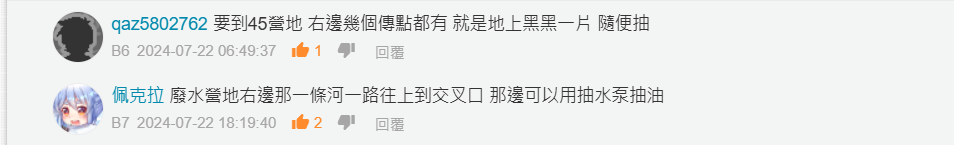

In [4]:
import tkintermapview as tkmap
address = tkintermapview.convert_address_to_coordinates("United Kingdom")


Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/search?q=United+Kingdom&format=jsonv2&addressdetails=1&limit=1


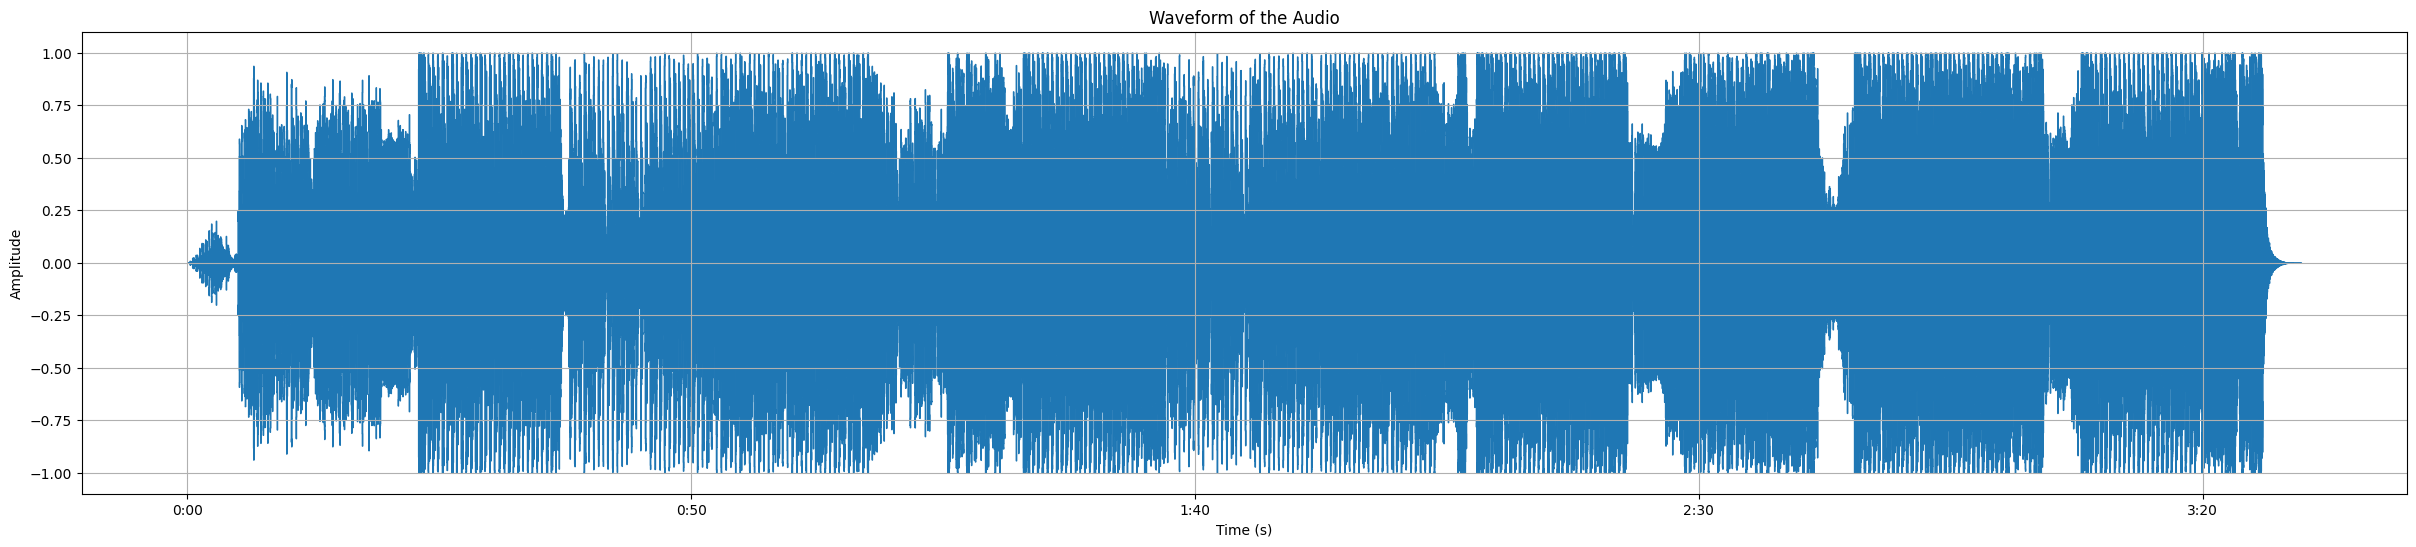

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 讀取音樂文件
audio_file = r"C:\Users\user\Downloads\八三夭831【致青春 Young Guns】Official Music Video.wav"  # 替換為音頻文件的路徑
y, sr = librosa.load(audio_file, sr=None)  # y是波形數據，sr是取樣率

# 創建波形圖
plt.figure(figsize=(30, 6))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of the Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import display, Audio

# 加載音樂文件
audio_file = r"C:\Users\user\Downloads\八三夭831【致青春 Young Guns】Official Music Video.wav"
y, sr = librosa.load(audio_file, sr=None)

# 創建波形圖
def plot_waveform(position=0.0):
    # 當前位置，將其轉換為樣本位置
    sample_position = int(position * len(y))

    # 繪製波形
    plt.figure(figsize=(20, 6))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform of the Audio')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # 在波形上繪製進度條（顯示音樂播放位置）
    plt.axvline(x=position, color='r', linestyle='--', label='Current Playback Position')
    plt.legend()
    plt.grid(True)

    # 顯示圖形
    plt.show()

    # 播放音樂（播放音樂從當前位置開始）
    display(Audio(y[sample_position:], rate=sr))

# 創建交互式滑塊
slider = FloatSlider(
    value=0.0,  # 初始值
    min=0.0,    # 最小值
    max=1.0,    # 最大值，1代表音樂結束
    step=0.01,  # 每次變化的步長
    description='Position:',
    continuous_update=False  # 用戶滑動時才更新
)

# 顯示交互式控制
interact(plot_waveform, position=slider)


In [2]:
import tkinter as tk
from tkinter import ttk
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from IPython.display import display, Audio
from ipywidgets import FloatSlider

# 加載音樂文件
audio_file = r"C:\Users\user\Downloads\八三夭831【致青春 Young Guns】Official Music Video.wav"
y, sr = librosa.load(audio_file, sr=None)

class AudioPlayerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Audio Player with Waveform")
        self.root.geometry("800x600")

        # 創建主框架
        self.main_frame = ttk.Frame(self.root)
        self.main_frame.pack(fill=tk.BOTH, expand=True)

        # 創建播放位置滑塊
        self.slider = FloatSlider(
            value=0.0,  # 初始值
            min=0.0,    # 最小值
            max=1.0,    # 最大值，1代表音樂結束
            step=0.01,  # 每次變化的步長
            description='Position:',
            continuous_update=False  # 用戶滑動時才更新
        )
        self.slider.observe(self.update_position, names='value')

        # 顯示波形
        self.figure = plt.Figure(figsize=(10, 6), dpi=100)
        self.ax = self.figure.add_subplot(111)
        self.canvas = FigureCanvasTkAgg(self.figure, master=self.main_frame)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        
        # 播放音樂的更新
        self.update_waveform()

    def update_waveform(self):
        # 當前位置，將其轉換為樣本位置
        position = self.slider.value
        sample_position = int(position * len(y))

        # 清除上一個波形
        self.ax.clear()

        # 繪製波形
        librosa.display.waveshow(y, sr=sr, ax=self.ax)
        self.ax.set_title('Waveform of the Audio')
        self.ax.set_xlabel('Time (s)')
        self.ax.set_ylabel('Amplitude')

        # 在波形上繪製進度條（顯示音樂播放位置）
        self.ax.axvline(x=position, color='r', linestyle='--', label='Current Playback Position')
        self.ax.legend()
        self.ax.grid(True)

        # 更新顯示
        self.canvas.draw()

    def update_position(self, change):
        # 更新播放位置並重新顯示波形
        self.update_waveform()
        
        # 播放音樂（播放音樂從當前位置開始）
        sample_position = int(change['new'] * len(y))
        display(Audio(y[sample_position:], rate=sr))

# 創建主應用窗口
root = tk.Tk()
app = AudioPlayerApp(root)

# 啟動應用
root.mainloop()


In [4]:
import tkinter as tk
from tkinter import filedialog
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class AudioPlayerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Audio Player with Drag and Drop")

        # 設置音檔和時間軸
        self.audio = None
        self.playhead_pos = 0
        self.timeframe_start = 0
        self.timeframe_end = 800  # 時間軸的寬度代表音樂的總時長

        # 設置 Canvas 並放置波形圖和播放進度條
        self.canvas = tk.Canvas(self.root, width=800, height=200)
        self.canvas.pack()

        self.playhead = self.canvas.create_line(self.playhead_pos, 100, self.playhead_pos, 150, width=2, fill="red")
        
        # 加載音檔的按鈕
        self.load_button = tk.Button(self.root, text="Load Audio", command=self.load_audio)
        self.load_button.pack()

        # 可拖動的拼圖按鈕
        self.button = tk.Button(self.root, text="Puzzle", command=self.execute_function)
        self.button_id = self.canvas.create_window(100, 50, window=self.button)

        # 綁定拖動事件
        self.canvas.tag_bind(self.button_id, '<ButtonPress-1>', self.on_button_press)
        self.canvas.tag_bind(self.button_id, '<B1-Motion>', self.on_button_drag)
        self.canvas.tag_bind(self.button_id, '<ButtonRelease-1>', self.on_button_release)

        self.start_x = None
        self.start_y = None
        self.button_position = 100  # 按鈕的初始位置

        # 播放音頻並更新進度
        self.update_playhead()

    def load_audio(self):
        # 打開檔案選擇器並選擇音檔
        file_path = filedialog.askopenfilename(filetypes=[("Audio Files", "*.mp3;*.wav")])
        
        if file_path:
            self.audio = AudioSegment.from_file(file_path)
            self.plot_waveform()

    def plot_waveform(self):
        if not self.audio:
            return
        
        # 計算音頻波形
        samples = np.array(self.audio.get_array_of_samples())
        sample_rate = self.audio.frame_rate
        time = np.arange(len(samples)) / sample_rate

        # 顯示波形圖
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.plot(time, samples)
        ax.set_title("Audio Waveform")
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Amplitude")
        
        # 清除舊的波形並繪製新波形
        if hasattr(self, 'waveform_canvas'):
            self.waveform_canvas.get_tk_widget().destroy()

        self.waveform_canvas = FigureCanvasTkAgg(fig, self.canvas)
        self.waveform_canvas.get_tk_widget().pack()

        # 顯示時間軸
        self.plot_timeframe(time)

    def plot_timeframe(self, time):
        # 顯示時間軸
        fig, ax = plt.subplots(figsize=(10, 1))
        ax.plot(time, np.zeros_like(time), color="black")
        ax.set_xlim(0, time[-1])
        ax.set_yticks([])
        ax.set_xticks(np.arange(0, time[-1], step=1))
        
        if hasattr(self, 'timeframe_canvas'):
            self.timeframe_canvas.get_tk_widget().destroy()

        self.timeframe_canvas = FigureCanvasTkAgg(fig, self.canvas)
        self.timeframe_canvas.get_tk_widget().pack()

    def on_button_press(self, event):
        # 記錄拖動開始的位置
        self.start_x = event.x
        self.start_y = event.y

    def on_button_drag(self, event):
        # 計算按鈕移動的偏移量並移動按鈕
        dx = event.x - self.start_x
        self.canvas.move(self.button_id, dx, 0)
        self.start_x = event.x

        # 更新按鈕在時間軸上的位置
        self.button_position += dx

    def on_button_release(self, event):
        # 當按鈕放開時，輸出當前位置
        print(f"Button dropped at {self.button_position} on the timeframe.")

    def update_playhead(self):
        if not self.audio:
            return
        
        # 模擬播放進度條
        self.playhead_pos += 1  # 模擬播放進度
        if self.playhead_pos > self.timeframe_end:
            self.playhead_pos = self.timeframe_end

        # 更新播放進度條的位置
        self.canvas.coords(self.playhead, self.playhead_pos, 100, self.playhead_pos, 150)

        # 檢查播放進度條是否到達拼圖的邊界
        if self.playhead_pos >= self.button_position and self.playhead_pos < self.button_position + 50:
            self.execute_function()

        # 繼續更新進度
        self.root.after(100, self.update_playhead)

    def execute_function(self):
        # 當播放進度條到達拼圖時，執行功能
        print("Puzzle function triggered!")

if __name__ == "__main__":
    root = tk.Tk()
    app = AudioPlayerApp(root)
    root.mainloop()


c:\Users\user\miniconda3\envs\venv\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
import pygame

# 初始化 Pygame
pygame.init()

# 設定螢幕尺寸
screen = pygame.display.set_mode((800, 600))

# 設定顏色
WHITE = (255, 255, 255)
RED = (255, 0, 0)

# 設定初始位置
x = 50
y = 50
speed = 2

# 設定遊戲運行標誌
running = True

# 遊戲循環
while running:
    # 事件處理
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # 移動矩形
    keys = pygame.key.get_pressed()
    if keys[pygame.K_LEFT]:
        x -= speed
    if keys[pygame.K_RIGHT]:
        x += speed
    if keys[pygame.K_UP]:
        y -= speed
    if keys[pygame.K_DOWN]:
        y += speed

    # 填充背景
    screen.fill(WHITE)

    # 畫出矩形
    pygame.draw.rect(screen, RED, (x, y, 50, 50))

    # 更新螢幕
    pygame.display.update()

# 退出遊戲
pygame.quit()


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
file_path = r"C:\Users\user\Desktop\AI\全台縣市電車登記數量.xlsx"  # Replace with your file path
data = pd.read_excel(file_path)

# Select numeric columns for processing
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Standardization (Z-Score Normalization)
scaler_standard = StandardScaler()
standardized_data = pd.DataFrame(
    scaler_standard.fit_transform(data[numeric_columns]),
    columns=numeric_columns
)

# Normalization (Min-Max Scaling)
scaler_minmax = MinMaxScaler()
normalized_data = pd.DataFrame(
    scaler_minmax.fit_transform(data[numeric_columns]),
    columns=numeric_columns
)

# Combine processed data with non-numeric columns
processed_data = data.copy()
processed_data[numeric_columns] = normalized_data  # Replace with standardized_data if preferred

# Save the processed data to a new file
output_file_path = r"C:\Users\user\Desktop\processed_data.xlsx"  # Replace with your desired output path
processed_data.to_excel(output_file_path, index=False)

print(f"Data has been successfully saved to {output_file_path}")


Data has been successfully saved to C:\Users\user\Desktop\processed_data.xlsx
